## Association Between Rank In Qualifying And Race Day 

### imports

In [1]:
import psycopg2
import numpy as np
import pandas as pd
from datetime import datetime

### Importing Data

In [2]:
df = pd.read_excel (r'test.xlsx')


In [3]:
df.head()

,Unnamed: 0,nameDriver,rank,position_q,position_race,position_qualifiying
0,0,Sergio Pérez,5,11,5 in race,11 in q
1,1,Sergio Pérez,5,11,5 in race,11 in q
2,2,Daniel Ricciardo,5,4,5 in race,4 in q
3,3,Daniel Ricciardo,5,4,5 in race,4 in q
4,4,Daniel Ricciardo,6,6,6 in race,6 in q


#### droping unwanted collums

In [4]:
df.drop(columns=[
                   'Unnamed: 0','rank','position_q','nameDriver'
                   ],axis=1,inplace=True)

## Applying Apriori Algorithm

### Imports

In [5]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [6]:
items= []
for i in range(0,4758):
    items.append([str(df.values[i,j]) for j in range(2)  ])

In [7]:
enc = TransactionEncoder()
enc_ary = enc.fit(items).transform(items)
df = pd.DataFrame(enc_ary, columns=enc.columns_)
print (df)

      1 in q  1 in race  10 in q  10 in race  11 in q  11 in race  12 in q  \
0      False      False    False       False     True       False    False   
1      False      False    False       False     True       False    False   
2      False      False    False       False    False       False    False   
3      False      False    False       False    False       False    False   
4      False      False    False       False    False       False    False   
...      ...        ...      ...         ...      ...         ...      ...   
4753   False      False    False       False     True       False    False   
4754   False      False    False       False    False       False     True   
4755   False      False    False       False    False       False     True   
4756   False      False    False       False    False       False    False   
4757   False      False    False       False    False       False    False   

      12 in race  13 in q  13 in race  ...  5 in q  5 in race  

In [8]:
frequent_itemsets = apriori(df, min_support=0.0045 , use_colnames=True)

In [9]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)


In [10]:
rules=rules.filter(['antecedents','consequents','confidence'],axis=1)

In [11]:
rules.sort_values(by='confidence',ascending=False).head(15)

,antecedents,consequents,confidence
1,(1 in q),(1 in race),0.549180
0,(1 in race),(1 in q),0.527559
77,(2 in q),(2 in race),0.327869
76,(2 in race),(2 in q),0.314961
86,(3 in q),(3 in race),0.291667
87,(3 in race),(3 in q),0.275591
5,(2 in q),(1 in race),0.262295
4,(1 in race),(2 in q),0.251969
2,(1 in q),(2 in race),0.245902
97,(4 in q),(4 in race),0.241667


In [12]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

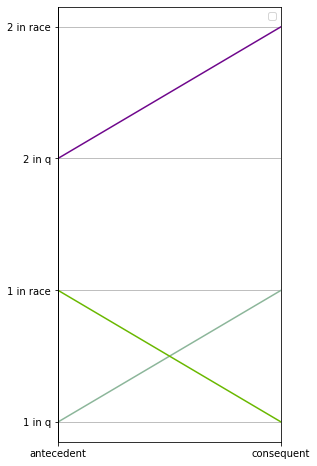

In [16]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

rule=rules.sort_values(by='confidence',ascending=False).head(3)
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rule)

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()